In [4]:
import matplotlib.pyplot as plt
import pymiediff as pmd
import torch
import numpy as np

# Optimisation example with multiple starting points.

In [5]:
# define range of starting parameter combinations
r_c_min, r_c_max = 10.0, 20.0
r_s_min, r_s_max = 45.0, 55.0
n_c_min, n_c_max = 2.0 + 0.1j, 2.0 + 0.1j
n_s_min, n_s_max = 5.0 + 0.2j, 5.0 + 0.2j

# define number of starting parameter combinations
NumComb = 10

r_c0, r_s0, n_c0, n_s0 = pmd.seedComb(
    r_c_min,
    r_c_max,
    r_s_min,
    r_s_max,
    n_c_min,
    n_c_max,
    n_s_min,
    n_s_max,
    NumComb=NumComb,
)


# Create particle class, we first define the starting parameters, this can be multiple
# or single vauled

test_particle = pmd.particle(
    r_c=r_c0,
    r_s=r_s0,
    n_c=n_c0,
    n_s=n_s0,
)

In [6]:
# Define wavelengths to be optimised for.

starting_wavelength = 200  # nm
ending_wavelength = 600  # nm

N_pt_test = 200

k0 = (
    2 * torch.pi / torch.linspace(starting_wavelength, ending_wavelength, N_pt_test, dtype=torch.double)
)


## Define target spectra.

In [7]:
# TODO add function in main to draw target spectrum.

res_cs = pmd.farfield.cross_sections(
    k0=k0,
    r_c=30.0,
    eps_c=(4.0 + 0.1j) ** 2,
    r_s=50.0,
    eps_s=(3.0 + 0.1j) ** 2,
    eps_env=1,
    n_max=8,
)

target = res_cs["q_sca"]

### Begin optimisation.

In [8]:
LossCurves = test_particle.optimise(k0, target, max_iter=200)

Starting run 1.
0 1.7597208181145816
50 0.41047863001741924
100 0.009015332518366342
150 0.009055939893021598
200 0.007947408141957976
Run 1 completed!
Starting run 2.
0 1.177182683472752
50 0.4141531408767667
100 0.01499525505867195
150 0.010880946367366539
200 0.00882829538089468
Run 2 completed!
Starting run 3.
0 2.3911030924732124
50 0.36773797382020684
100 0.011502503445953952
150 0.010063044900260866
200 0.008608867751694086
Run 3 completed!
Starting run 4.
0 4.36427141547145
50 1.7003944056328448
100 1.2296028621560753
150 0.28485464918985365
200 0.2313609057693201
Run 4 completed!
Starting run 5.
0 2.1100203190142564
50 0.3651198193646685
100 0.28777577725270115
150 1.6696209262067652
200 0.37712738438647714
Run 5 completed!
Starting run 6.
0 2.932459965288619
50 0.36200395983642564
100 0.014892718694492529
150 0.00976078664679929
200 0.008743964266326195
Run 6 completed!
Starting run 7.
0 4.146724653981379
50 1.754254364821844
100 1.6467189322883393
150 1.0669768950623302
200 

### Plot results of optimisation.

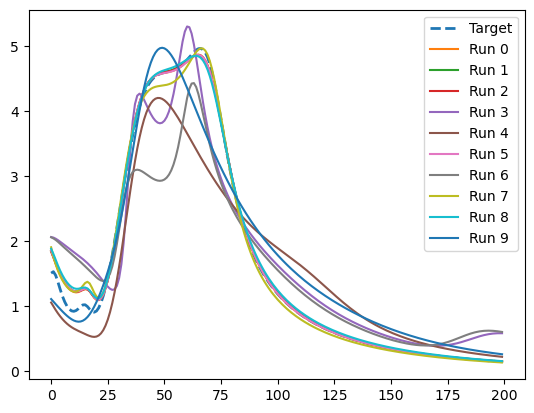

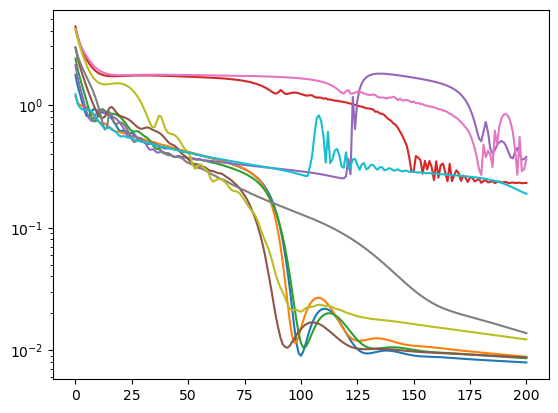

In [9]:
plt.plot(target.detach().numpy(), label = "Target", linestyle = "--", linewidth = 2.0)
for i, (r_c0, r_s0, n_c0, n_s0) in enumerate(
    zip(
        test_particle.core_radius,
        test_particle.shell_radius,
        test_particle.core_refractiveIndex,
        test_particle.shell_refractiveIndex,
    )
):
    args = (k0, r_c0, n_c0**2, r_s0, n_s0**2)
    to_plot = pmd.farfield.cross_sections(*args)["q_sca"] # Resimulation
    plt.plot(to_plot, label = "Run {}".format(i))
plt.legend()
plt.show()



for loss in LossCurves:
    plt.plot(loss)
    plt.yscale("log")
plt.show()